<div style="color: green; font-size: 24px;"><b>Supervised Learning Project </b></div>
<br>
<div style="color: green; font-size: 13px;">By</div>
<br>
<div style="color: green; font-size: 20px;">Prashant Patil</div>
<br>
<div style="color: green; font-size: 15px;">AIML Online October 2023-A Batch | Date : 28-Jan-2024</div>
<br>


In [1]:
# import all needful libraries
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc, precision_score, recall_score,make_scorer, f1_score, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Part A

## Q1. Data Understanding

### Q1.A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [2]:
#Lets store data in 3 dataframes
dfN = pd.read_csv('Normal.csv')
dfH = pd.read_csv('Type_H.csv')
dfS = pd.read_csv('Type_S.csv')

### Q1.B. Print Shape and columns of all the 3 DataFrames.

In [3]:
print('*'*20,'Dataframe Normal','*'*20) 
print('Shape:', dfN.shape)
print('Columns:', dfN.columns)
print('*'*20,'Dataframe Type_H', '*'*20) 
print('Shape:', dfH.shape)
print('Columns:', dfH.columns)
print('*'*20,'Dataframe Type_S','*'*20) 
print('Shape:', dfS.shape)
print('Columns:', dfS.columns)

******************** Dataframe Normal ********************
Shape: (100, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
******************** Dataframe Type_H ********************
Shape: (60, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
******************** Dataframe Type_S ********************
Shape: (150, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### Q1.C. Compare Column names of all the 3 DataFrames and clearly write observations

In [4]:
if(dfN.columns.tolist()==dfH.columns.tolist()==dfS.columns.tolist()):
    print('All three dataframes are having same columns.')

All three dataframes are having same columns.


### Q1.D. Print DataTypes of all the 3 DataFrames

In [5]:
print('*'*20,'Dataframe Normal','*'*20) 
print(dfN.dtypes)
print('*'*20,'Dataframe Type_H','*'*20) 
print(dfH.dtypes)
print('*'*20,'Dataframe Type_S','*'*20) 
print(dfS.dtypes)

******************** Dataframe Normal ********************
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
******************** Dataframe Type_H ********************
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
******************** Dataframe Type_S ********************
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### Q1.E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [6]:
print(dfN.groupby('Class')['Class'].value_counts())
print(dfH.groupby('Class')['Class'].value_counts())
print(dfS.groupby('Class')['Class'].value_counts())
print('This shows each of the dataframe is having one class type respectively. However, values are having either typos and few are in small case.')

Class
Normal    73
Nrmal     27
Name: count, dtype: int64
Class
Type_H    37
type_h    23
Name: count, dtype: int64
Class
Type_S    133
tp_s       17
Name: count, dtype: int64
This shows each of the dataframe is having one class type respectively. However, values are having either typos and few are in small case.


## Q.2 Data Preparation and Exploration

### Q2.A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [7]:
#Since we have already checked class varible values and observed that each dataframe has 1 value but with some variations as typos. 
#We can now assign correct values to class feature of each dataframe.
dfN['Class'] = 'normal'
dfH['Class'] = 'type_h'
dfS['Class'] = 'type_s'

### Q2.B. Combine all the 3 DataFrames to form a single DataFrame

In [8]:
df = pd.concat([dfN, dfH, dfS], ignore_index=True)
print('shape of new dataframe: ',df.shape)

shape of new dataframe:  (310, 7)


In [9]:
#Lets observe data
df.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  normal

### Q2.C. Print 5 random samples of this DataFrame 

In [10]:
rand_samples = df.sample(5)
print(rand_samples)

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
42     42.918041  -5.845994  58.000000  48.764035  121.606859  -3.362045   
54     54.503685   6.819910  47.000000  47.683775  111.791172  -4.406769   
288    85.680950  38.650035  82.680977  47.030914  120.840707  61.959034   
21     53.911054  12.939318  39.000000  40.971736  118.193035   5.074353   
245    85.643787  42.689195  78.750664  42.954592  105.144076  42.887426   

      Class  
42   normal  
54   normal  
288  type_s  
21   normal  
245  type_s  


### Q2.D. Print Feature-wise percentage of Null values

In [11]:
#print null values percentages
print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100) 
print('There are no null values observed in data')

percentage of missing data of dataframe 
 P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64
There are no null values observed in data


### Q2.E. Check 5-point summary of the new DataFrame

In [12]:
# df.describe()
# Describe funstion also can provide summarry. However, we will use quantile function for finding 5 point summary along with boxplot.
dfnumeric = df.apply(pd.to_numeric, errors='coerce')
summary = dfnumeric.quantile([0, 0.25, 0.5, 0.75, 1]).T
print(summary)
fig = px.box(df[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']])
fig.show()

                  0.00        0.25        0.50        0.75        1.00
P_incidence  26.147921   46.430294   58.691038   72.877696  129.834041
P_tilt       -6.554948   10.667069   16.357689   22.120395   49.431864
L_angle      14.000000   37.000000   49.562398   63.000000  125.742385
S_slope      13.366931   33.347122   42.404912   52.695888  121.429566
P_radius     70.082575  110.709196  118.268178  125.467674  163.071041
S_Degree    -11.058179    1.603727   11.767934   41.287352  418.543082
Class              NaN         NaN         NaN         NaN         NaN


It has been noticed that almost all variables have outliers but S_Degree, P_tilt and P_radious has more outliers.

## Q.3. Data Analysis

### Q.3.A. Visualize a heatmap to understand correlation between all features

Correlation matrix:
             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000
*****************Heatmap*********************


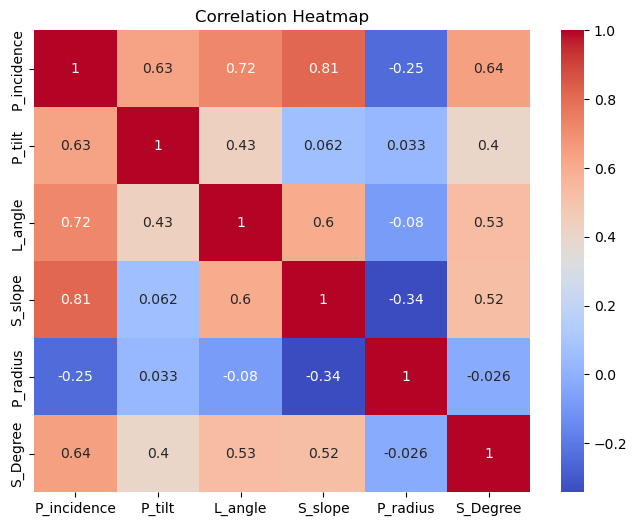

In [13]:
#Lets check correlation between numeric variables

#Lets create a correlation for numeric columns
corr = df[['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']].corr()
print('Correlation matrix:')
print(corr)
print('*****************Heatmap*********************')
#Lets plot heatmap using correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

__Heatmap Summary__

* Strong Positive Correlations: The variables P_incidence and S_slope exhibit a strong positive correlation of approximately 0.81. This suggests that as one of these variables increases, the other tends to increase as well. There is a strong positive correlation (around 0.72) between P_incidence and L_angle, indicating a tendency for these variables to increase or decrease together.

* Weak Positive Correlations: There is positive week correlation(0.033) between 'P_tilt' and 'S_Degree'

* Weak Negative Correlations: There is weakest negative correlation(-0.026) between 'P_radius' and 'S_Degree'.

* P_tilt and S_slope, P_tilt and P_radius, and P_radius and S_Degree have relatively low correlations, suggesting a weaker linear relationship between these pairs.

* Interpretation:The strongest correlations involve P_incidence, suggesting its influence on other spinal parameters.


### Q.3.B Share insights on correlation

### Q.3.B.A. Features having stronger correlation with correlation value.

In [14]:
print('Heatmap states that there is strong correlation(0.81) between \'P_incidence\' and \'S_slope\'. Also, there is correlation(0.72) between \'P_incidence\' and \'L_angle\'')##

Heatmap states that there is strong correlation(0.81) between 'P_incidence' and 'S_slope'. Also, there is correlation(0.72) between 'P_incidence' and 'L_angle'


### Q.3.B.B. Features having weaker correlation with correlation value

In [15]:
print('Heatmap states that there is weakest negative correlation(-0.026) between \'P_radius\' and \'S_Degree\'. Also there is positive week correlation(0.033) between \'P_tilt\' and \'S_Degree\'')

Heatmap states that there is weakest negative correlation(-0.026) between 'P_radius' and 'S_Degree'. Also there is positive week correlation(0.033) between 'P_tilt' and 'S_Degree'


### Q.3.C Visualize a pairplot with 3 classes distinguished by colors and share insights

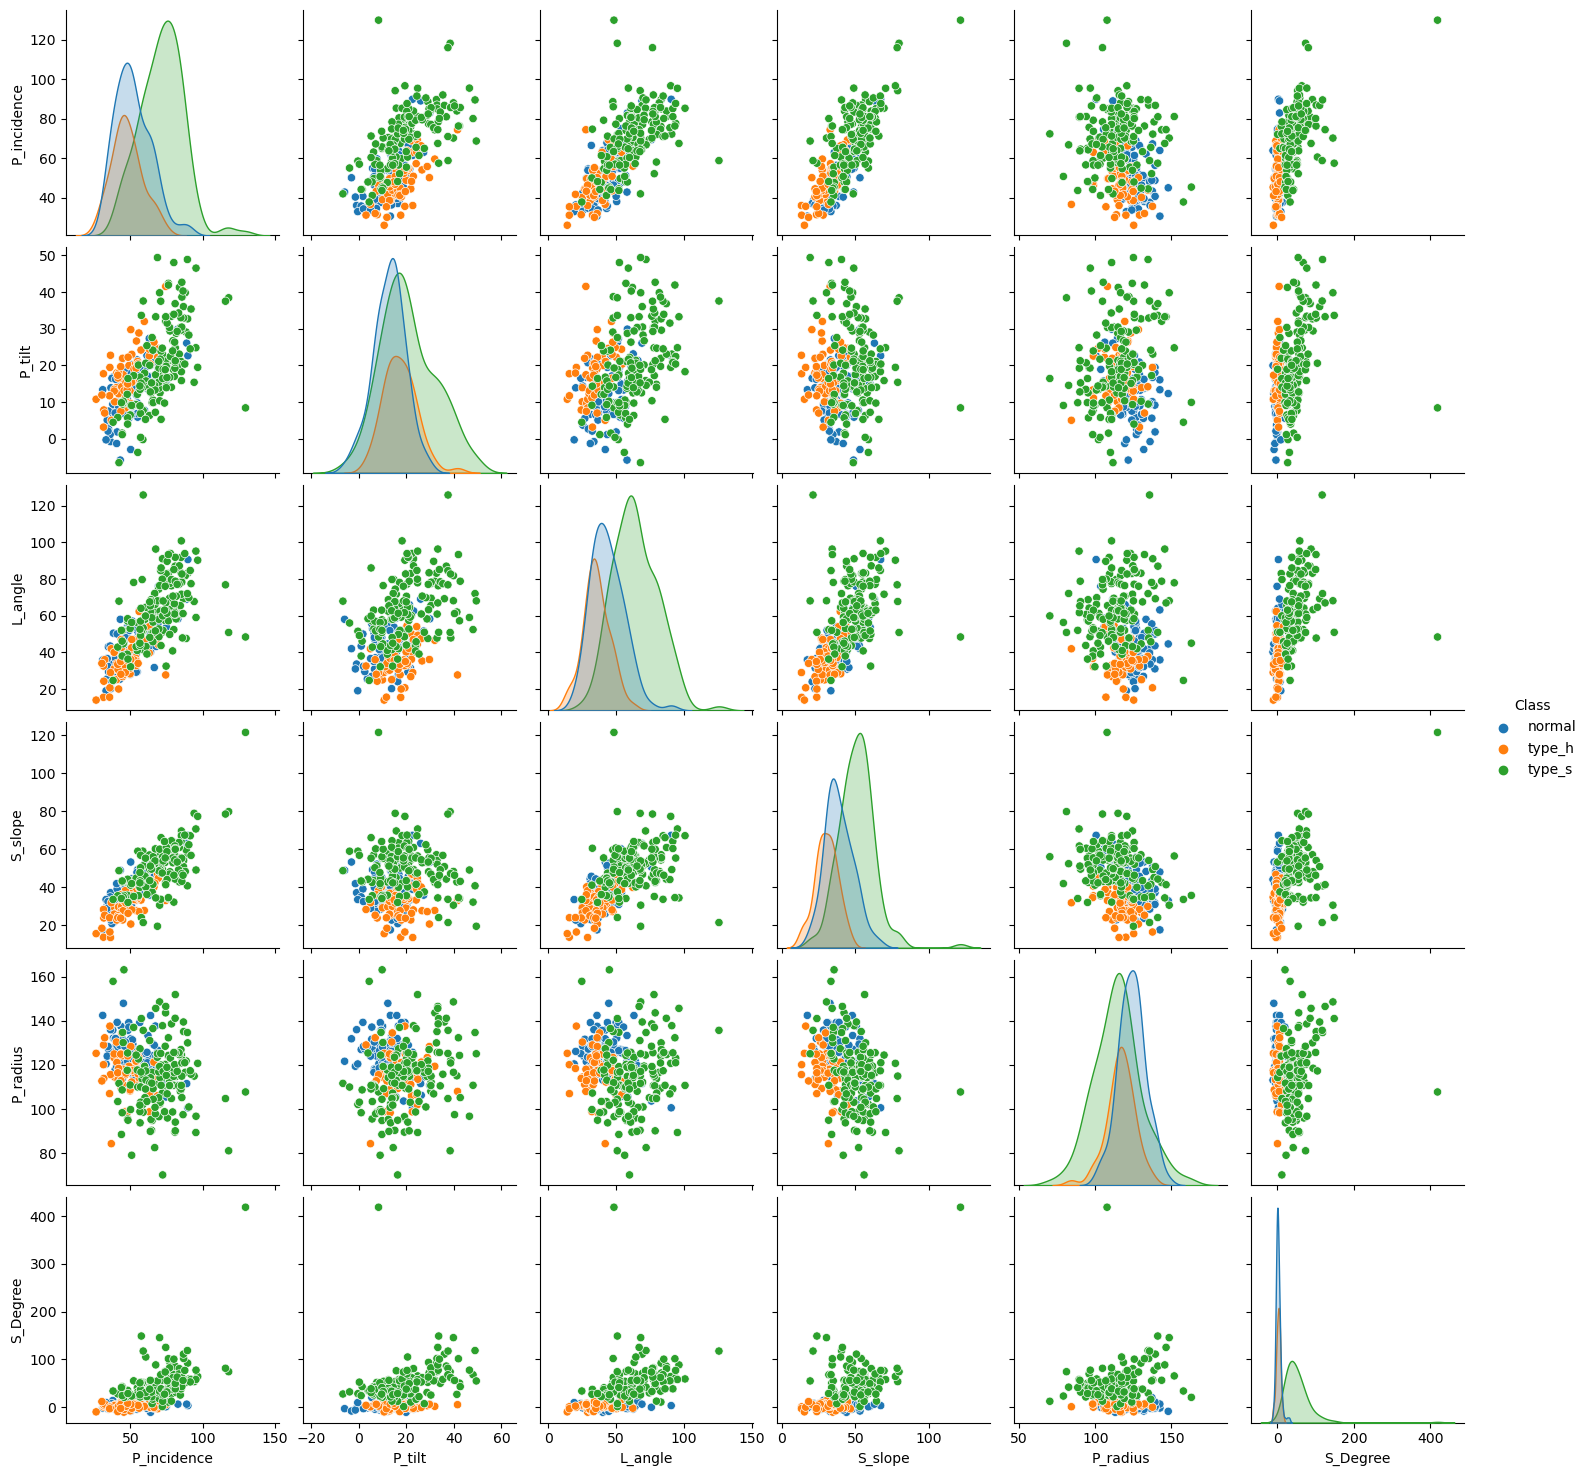

In [16]:
sns.pairplot(df, hue='Class')
plt.show()

__Pair plot obervations__

1. Distribution of attributes are not same across all classes.
2. There is positive corelation between P_incidence and P_tilt, L_angle, S_slope. Type_S class contributes significantly to result positive distribution.
3. S_Degree and P_radius does not show any correlation with other features.
4. Type_s class has high distribution for S_Degree as compared to other classes.
5. Overall, type_s has high distribution across all features. Also it contributes more to form linerity.
6. There are outliers across all the variables

### Q.3.D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. 

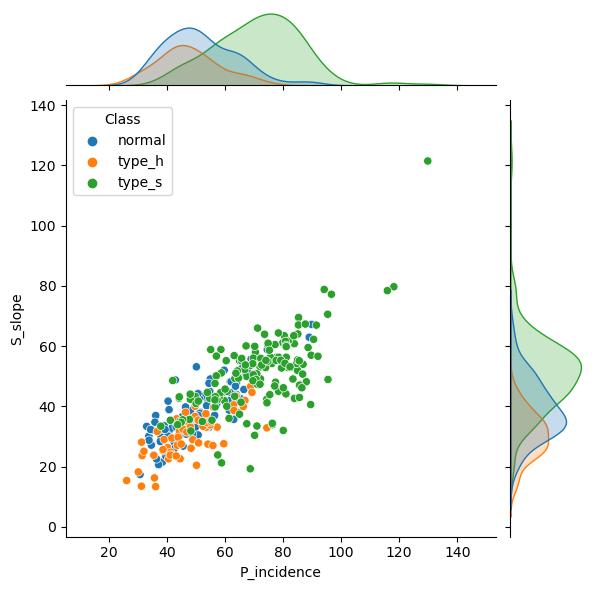

In [17]:
sns.jointplot(data=df, x='P_incidence', y='S_slope',  kind='scatter', hue='Class')
plt.show()

Jointplot observations
1. P_incidence and S_slope are positively corelated
2. Type_s distribution is high as compared to other two classes. 
3. Type_s contributes more to form corelation between S_slope.
4. There is one outlier of Type_S.
5. Type_S distribution is slightly left skewed

### Q.3.E. Visualize a boxplot to check distribution of the features and share insights.

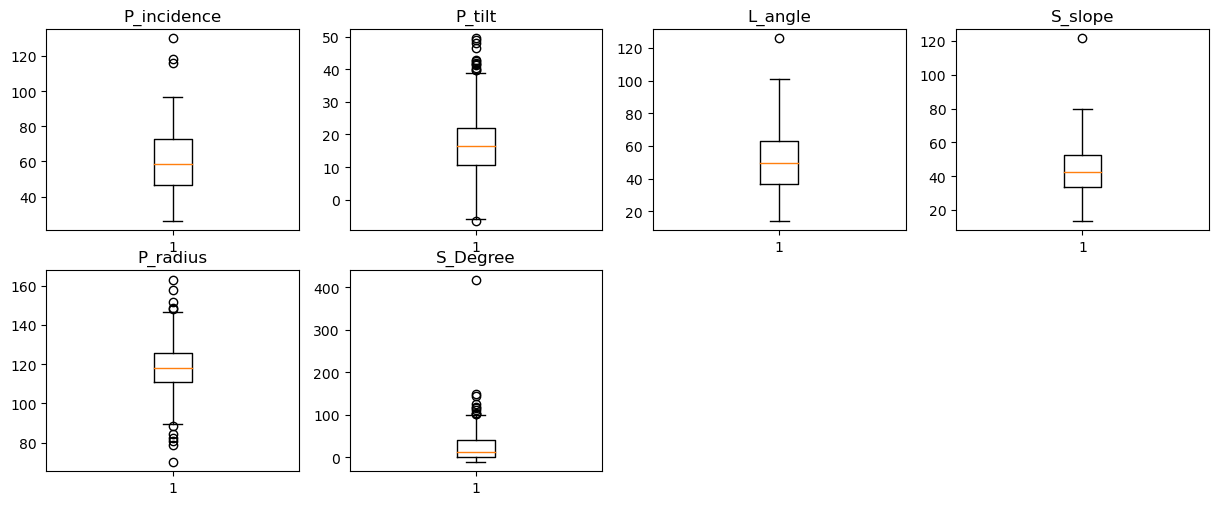

In [18]:
numeric_columns = ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    #plt.tight_layout();
    plt.title(variable)
plt.show();

__Boxplot observations__

1. S_Degree distribution is right skewed and it has lot of outliers.
2. Every variable has outliers. However they are in large extent in S_Degree and P_tilt.
3. P_tilt and P_radious has outlier at both sides.

### Q4. Model Building

__Data analysis & Goal statement__

* The dataset provides medical details of individuals, including a diagnosis (Class variable) indicating whether the patient has spinal issues.

* Notably, Type_S and Type_H diagnoses appear to be associated with problematic conditions, while Normal diagnoses are indicative of non-problematic cases.

* In our analysis, we treat Type_S and Type_H values as positive diagnoses, considering them as cases requiring attention, and Normal diagnoses as negative, representing non-problematic cases.

* The primary focus of our analysis is to accurately predict outcomes for Type_S and Type_H, with a particular emphasis on minimizing false negatives.

* Therefore, our ultimate goal is to identify a model that achieves the highest **Recall** value for **Type_S and Type_H**, ensuring a robust ability to capture and correctly predict instances of spinal issues. Also we will measure overall accuracy of model.

### Q4.A. Split data into X and Y

In [19]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

### Q4.B. Split data into train and test with 80:20 proportion

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 6)
(248,)
(62, 6)
(62,)


### Miscellenious : Common functions

We need certain common functions that can be reused when we perform certain activities repeatatively. Lets create and define common functions for below repeatative tasks:

1. Create results dataframe
2. Add output of each model/combinations in results dataframe
3. Print and store dataframe
4. Use KNN model for various combinations and dataset provided
5. Find best K and plot various results for each k value

In [21]:
#Lets create a result dataframe that will store output of each model/combinations. This will be helpful for drawing conclusion about best model
columnsResult = ['Model', 'Accuracy','Precision','Precision_N', 'Recall_N', 'F1_Score_N','Precision_H', 'Recall_H', 'F1_Score_H','Precision_S', 'Recall_S', 'F1_Score_S']
results_model = pd.DataFrame(columns=columnsResult)

In [22]:
#Lets create a function that will add output for respective model/combination in result dataframe

def AddResults(df, model, accuracy, precision, precision_1, recall_1, f1_score_1, precision_2, recall_2, f1_score_2,precision_3, recall_3, f1_score_3):
    
    if (df['Model'] == model).any(): 
        
        df.loc[df['Model'] == model, ['Accuracy','Precision','Precision_N', 'Recall_N', 'F1_Score_N','Precision_H', 'Recall_H', 'F1_Score_H','Precision_S', 'Recall_S', 'F1_Score_S']] = [accuracy, precision,precision_1, recall_1, f1_score_1, precision_2, recall_2, f1_score_2, precision_3, recall_3, f1_score_3]
        
    else:
        # Append a new row  
        
        new_row = {'Model': model, 'Accuracy': accuracy,'Precision' : precision, 'Precision_N': precision_1, 'Recall_N': recall_1, 'F1_Score_N': f1_score_1, 'Precision_H': precision_2, 'Recall_H': recall_2, 'F1_Score_H': f1_score_2,'Precision_S': precision_3, 'Recall_S': recall_3, 'F1_Score_S': f1_score_3}
        
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        
    return df


In [23]:
#Lets create a function that will print output for model performance. Also this will internally call function AddResults
def PrintOutputMetrics(results, Name, y_actuals, y_pred):
    accuracy = accuracy_score(y_actuals, y_pred)
    precision = precision_score(y_actuals, y_pred, average='weighted')
    recall = recall_score(y_actuals, y_pred, average='weighted')
    f1 = f1_score(y_actuals, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_actuals, y_pred)
    classification_rep = classification_report(y_actuals, y_pred)
    
    # Print the evaluation metrics
    print('*'*15, Name, '*'*15)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1-Score:",f1)
    print("Confusion Matrix:")
    print(conf_matrix)
   
    print("Classification Report:")
    print(classification_rep)
    print('*'*80)
    C_precision, C_recall, C_f1_score, _ = np.round(precision_recall_fscore_support(y_actuals, y_pred, average=None),2)
    
    return AddResults(results, Name, np.round(accuracy,2), np.round(precision,2) , C_precision[0], C_recall[0], C_f1_score[0], C_precision[1], C_recall[1], C_f1_score[1], C_precision[2], C_recall[2], C_f1_score[2])

### Q4.C. Train a Supervised Learning Classification base model using KNN classifier. 

In [24]:
#lets write a function to find best optimal k value for KNN model
def FindBestK(X_train_k, y_train_k, X_test_k, y_test_k, size):
    myList = list(range(1,size))

    # subsetting just the odd ones
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold accuracy scores
    ac_scores = []

    # perform accuracy metrics for values from 1,3,5....19
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_k,y_train_k)
        # predict the response
        y_pred = knn.predict(X_test_k)
        # evaluate accuracy
        scores = accuracy_score(y_test_k, y_pred)
        ac_scores.append(scores)

    # changing to misclassification error
    MSE = [1 - x for x in ac_scores]
     # plot misclassification error vs k
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]    
    print("The optimal number of neighbors is %d" % optimal_k)
    return optimal_k
    

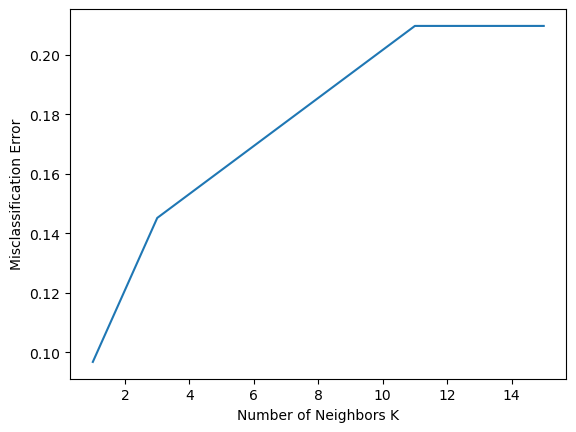

The optimal number of neighbors is 1


In [25]:
sqrt_n = int(np.sqrt(len(X_train + X_test)))
optimal_k = FindBestK(X_train, y_train, X_test, y_test, sqrt_n)

In [26]:
# Lets declare knn model with basic and default parameters and using k = 5. We will fine tune parameters in later phases
# Optimal_k value is 1 however we wont use 1 as we dotn want to overfit model.
knn_default = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn_default.fit(X_train, y_train)

#predict the response
y_test_pred = knn_default.predict(X_test)
y_train_pred = knn_default.predict(X_train)
#accuracy
accuracyTrain_default = accuracy_score(y_train, y_train_pred)
print("Training data Accuracy", accuracyTrain_default)
accuracyTest_default = accuracy_score(y_test, y_test_pred)
print("Test data Accuracy", accuracyTest_default)
precision_score_Default_partA = precision_score(y_test, y_test_pred, average='weighted')

Training data Accuracy 0.8911290322580645
Test data Accuracy 0.8387096774193549


We have fit our basic model with default parameters and overall accuracy looks descent. Lets dig geep into class-wise measures using various metrics.

### Q.4.D. Print all the possible performance metrics for both train and test data

In [27]:
# Print performance metrics for the training data with default parameters
results_model = PrintOutputMetrics(results_model, 'KNN | Training Data',y_train, y_train_pred)
results_model = PrintOutputMetrics(results_model, 'KNN | Testing Data',y_test, y_test_pred)


*************** KNN | Training Data ***************
Accuracy: 0.8911290322580645
Precision: 0.89213699601812
Recall: 0.8911290322580645
F1-Score: 0.8912056814918405
Confusion Matrix:
[[ 71  10   1]
 [ 13  36   0]
 [  3   0 114]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.82      0.87      0.84        82
      type_h       0.78      0.73      0.76        49
      type_s       0.99      0.97      0.98       117

    accuracy                           0.89       248
   macro avg       0.86      0.86      0.86       248
weighted avg       0.89      0.89      0.89       248

********************************************************************************
*************** KNN | Testing Data ***************
Accuracy: 0.8387096774193549
Precision: 0.8633064516129032
Recall: 0.8387096774193549
F1-Score: 0.8419435685989166
Confusion Matrix:
[[16  1  1]
 [ 4  7  0]
 [ 4  0 29]]
Classification Report:
              precision    recall  f1-scor

It can be noticed that class-wise score specially recall is not that great for basic KNN model. We need performance improvement in model.

### Q.5. Performance Improvement:

### Q.5.A. Experiment with various parameters to improve performance of the base model.

In [28]:
#Lets define a function that will help to experiment with various parameters while using KNN model
def KNNModel(df1,Data, n_neighbors, metric, weights,X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric=metric, weights = weights)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test) 
    Name = Data + 'KNN | n:'+ str(n_neighbors) + ', metric:' + metric + ', weights:' + weights
    return PrintOutputMetrics(df1, Name ,y_test, y_test_pred)

In [29]:
#Lets try using KNN model for various parameters to see best results
results_model = KNNModel(results_model,'', 3, 'euclidean', 'uniform',X_train, y_train, X_test, y_test)
results_model = KNNModel(results_model,'', 3, 'euclidean', 'distance',X_train, y_train, X_test, y_test)
results_model = KNNModel(results_model,'', 5, 'manhattan', 'uniform',X_train, y_train, X_test, y_test)
results_model = KNNModel(results_model,'', 5, 'manhattan', 'distance',X_train, y_train, X_test, y_test)
results_model = KNNModel(results_model,'', 7, 'euclidean', 'uniform',X_train, y_train, X_test, y_test)
results_model = KNNModel(results_model,'', 7, 'euclidean', 'distance',X_train, y_train, X_test, y_test)

*************** KNN | n:3, metric:euclidean, weights:uniform ***************
Accuracy: 0.8548387096774194
Precision: 0.8642249760876193
Recall: 0.8548387096774194
F1-Score: 0.8554435483870968
Confusion Matrix:
[[16  1  1]
 [ 4  7  0]
 [ 2  1 30]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.73      0.89      0.80        18
      type_h       0.78      0.64      0.70        11
      type_s       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62

********************************************************************************
*************** KNN | n:3, metric:euclidean, weights:distance ***************
Accuracy: 0.8548387096774194
Precision: 0.8642249760876193
Recall: 0.8548387096774194
F1-Score: 0.8554435483870968
Confusion Matrix:
[[16  1  1]
 [ 4  7  0]
 [ 2  1 30]]
Classification Repor

In [30]:
#Lets try finding best hyperparameters using better method ie. GridSearchCV

KNN = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 19,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_knn = grid_search.best_estimator_

# Evaluate the accuracy on the test set
y_pred_best = best_knn.predict(X_test)
accuracy_test_best = accuracy_score(y_test, y_pred_best)
print("Test data accuracy with best parameters:", accuracy_test_best)
precision_test_best = precision_score(y_test, y_pred_best, average='weighted')
print("Test Precision:", precision_test_best)

results_model = PrintOutputMetrics(results_model, 'KNN | Testing Data | HyperParams Tuning(grid_search):' + str(grid_search.best_params_),y_test, y_pred_best)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best score: 0.8387755102040817
Test data accuracy with best parameters: 0.8387096774193549
Test Precision: 0.8419460950764007
*************** KNN | Testing Data | HyperParams Tuning(grid_search):{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'} ***************
Accuracy: 0.8387096774193549
Precision: 0.8419460950764007
Recall: 0.8387096774193549
F1-Score: 0.8400509690832271
Confusion Matrix:
[[14  2  2]
 [ 3  8  0]
 [ 2  1 30]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.78      0.76        18
      type_h       0.73      0.73      0.73        11
      type_s       0.94      0.91      0.92        33

    accuracy                           0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62

******************************************************************

##### Lets try with data treamment (Remove corelated columns)

In [31]:
#lets remove columns that are corelated
dfNew = df.drop(columns = ['P_incidence'])
#Lets check training model with treated data

X1 = dfNew.drop(['Class'], axis=1)
Y1 = dfNew['Class']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size = 0.20,random_state=1)
results_model = KNNModel(results_model,'Remove P_incidence | Original Data | ', 3, 'euclidean', 'distance',X_train1, y_train1, X_test1, y_test1)



*************** Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance ***************
Accuracy: 0.9032258064516129
Precision: 0.9075604838709677
Recall: 0.9032258064516129
F1-Score: 0.9042482135860744
Confusion Matrix:
[[16  1  1]
 [ 2  9  0]
 [ 2  0 31]]
Classification Report:
              precision    recall  f1-score   support

      normal       0.80      0.89      0.84        18
      type_h       0.90      0.82      0.86        11
      type_s       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.88      0.88        62
weighted avg       0.91      0.90      0.90        62

********************************************************************************


In [32]:
#Lets print output of all combinations to infer about best model/combination
pd.set_option('display.max_colwidth', None)
results_model

Model  \
0                                                                                                     KNN | Training Data   
1                                                                                                      KNN | Testing Data   
2                                                                            KNN | n:3, metric:euclidean, weights:uniform   
3                                                                           KNN | n:3, metric:euclidean, weights:distance   
4                                                                            KNN | n:5, metric:manhattan, weights:uniform   
5                                                                           KNN | n:5, metric:manhattan, weights:distance   
6                                                                            KNN | n:7, metric:euclidean, weights:uniform   
7                                                                           KNN | n:7, metric:euclidean, weights:distance   
8  KNN | Testing Data | HyperParams Tuning(grid_search):{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}   
9                                      Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance   

   Accuracy  Precision  Precision_N  Recall_N  F1_Score_N  Precision_H  \
0      0.89       0.89         0.82      0.87        0.84         0.78   
1      0.84       0.86         0.67      0.89        0.76         0.88   
2      0.85       0.86         0.73      0.89        0.80         0.78   
3      0.85       0.86         0.73      0.89        0.80         0.78   
4      0.84       0.85         0.68      0.83        0.75         0.90   
5      0.84       0.85         0.68      0.83        0.75         0.90   
6      0.82       0.83         0.68      0.72        0.70         0.67   
7      0.85       0.86         0.74      0.78        0.76         0.75   
8      0.84       0.84         0.74      0.78        0.76         0.73   
9      0.90       0.91         0.80      0.89        0.84         0.90   

   Recall_H  F1_Score_H  Precision_S  Recall_S  F1_Score_S  
0      0.73        0.76         0.99      0.97        0.98  
1      0.64        0.74         0.97      0.88        0.92  
2      0.64        0.70         0.97      0.91        0.94  
3      0.64        0.70         0.97      0.91        0.94  
4      0.82        0.86         0.93      0.85        0.89  
5      0.82        0.86         0.93      0.85        0.89  
6      0.73        0.70         0.97      0.91        0.94  
7      0.82        0.78         0.97      0.91        0.94  
8      0.73        0.73         0.94      0.91        0.92  
9      0.82        0.86         0.97      0.94        0.95

### Q.5.B Clearly showcase improvement in performance achieved

##### Print all model results

In [33]:
#Lets now observe output of various combinations for building model
results_model.drop(results_model[results_model['Model'] == 'KNN | Training Data'].index, inplace=True)
pd.set_option('display.max_colwidth', None)
results_model

Model  \
1                                                                                                      KNN | Testing Data   
2                                                                            KNN | n:3, metric:euclidean, weights:uniform   
3                                                                           KNN | n:3, metric:euclidean, weights:distance   
4                                                                            KNN | n:5, metric:manhattan, weights:uniform   
5                                                                           KNN | n:5, metric:manhattan, weights:distance   
6                                                                            KNN | n:7, metric:euclidean, weights:uniform   
7                                                                           KNN | n:7, metric:euclidean, weights:distance   
8  KNN | Testing Data | HyperParams Tuning(grid_search):{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}   
9                                      Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance   

   Accuracy  Precision  Precision_N  Recall_N  F1_Score_N  Precision_H  \
1      0.84       0.86         0.67      0.89        0.76         0.88   
2      0.85       0.86         0.73      0.89        0.80         0.78   
3      0.85       0.86         0.73      0.89        0.80         0.78   
4      0.84       0.85         0.68      0.83        0.75         0.90   
5      0.84       0.85         0.68      0.83        0.75         0.90   
6      0.82       0.83         0.68      0.72        0.70         0.67   
7      0.85       0.86         0.74      0.78        0.76         0.75   
8      0.84       0.84         0.74      0.78        0.76         0.73   
9      0.90       0.91         0.80      0.89        0.84         0.90   

   Recall_H  F1_Score_H  Precision_S  Recall_S  F1_Score_S  
1      0.64        0.74         0.97      0.88        0.92  
2      0.64        0.70         0.97      0.91        0.94  
3      0.64        0.70         0.97      0.91        0.94  
4      0.82        0.86         0.93      0.85        0.89  
5      0.82        0.86         0.93      0.85        0.89  
6      0.73        0.70         0.97      0.91        0.94  
7      0.82        0.78         0.97      0.91        0.94  
8      0.73        0.73         0.94      0.91        0.92  
9      0.82        0.86         0.97      0.94        0.95

__Best Model__

Lets find best model(s) by using Recall measure of Type_H and Type_S.

In [34]:
#Lets try finding best model 
results_model['Recall_average'] = (results_model['Recall_H'] + results_model['Recall_S']) / 2
best_model_index = results_model['Recall_average'].idxmax()
best_model = results_model.loc[best_model_index]
default_model = results_model.loc[results_model['Model'] == 'KNN | Testing Data']


##### Print performance improvement

Best Model : Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance

Accuracy Before: 0.84 | Accuracy After : 0.90

Precision Before: 0.86 | Precision After: 0.91

Recall (Class_H) Before: 0.64 | Recall (Class_H) After: 0.82

Recall (Class_S) Before: 0.88 | Recall (Class_H) After: 0.94

We identified best model from various combinations. Lets now print the performance improved in terms of overall accuracy, overall precision, recall for type_H and type_S that matter the most in our scenario.

In [35]:
#Lets print improvement in model after parameter tuning and data treatment
print("Best Model:",best_model['Model'])

acc_improvement_percentage_test = np.round(((best_model.Accuracy - default_model.Accuracy[1]) / default_model.Accuracy[1]) * 100,2)
print("Accuracy improvement after tuning parameters and data treatment (%):", acc_improvement_percentage_test)

prec_improvement_percentage_test = np.round(((best_model.Precision - default_model.Precision[1]) / default_model.Precision[1]) * 100,2)
print("Precision improvement after tuning parameters and data treatment (%):", prec_improvement_percentage_test)

print('Apart from overall accuracy and precision, we are also interested in Recall for Type_H and Type_S')

recall_improvement_percentage_test = np.round((((best_model.Recall_H) - (default_model.Recall_H[1] )) / (default_model.Recall_H[1])) * 100,2)
print("Recall for Type_H improvement after tuning parameters and data treatment (%):", recall_improvement_percentage_test)

recall_improvement_percentage_test_S = np.round(((( best_model.Recall_S) - ( default_model.Recall_S[1])) / ( default_model.Recall_S[1])) * 100,2)
print("Recall for Type_S improvement after tuning parameters and data treatment (%):", recall_improvement_percentage_test_S)

# prec_improvement_percentage_test = np.round((((best_model.Precision_H + best_model.Precision_S) - (default_model.Precision_H[1] + default_model.Precision_S[1])) / (default_model.Precision_H[1] + default_model.Precision_S[1])) * 100,2)
# print("Precision (Type_H + Type_S) improvement on testing data after tuning parameters (%):", prec_improvement_percentage_test)


Best Model: Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance
Accuracy improvement after tuning parameters and data treatment (%): 7.14
Precision improvement after tuning parameters and data treatment (%): 5.81
Apart from overall accuracy and precision, we are also interested in Recall for Type_H and Type_S
Recall for Type_H improvement after tuning parameters and data treatment (%): 28.12
Recall for Type_S improvement after tuning parameters and data treatment (%): 6.82


__Observations__
We noticed that multiple techniques worked resulting better model performance.
Looking at the results for each combination, we can infer that below two models can be recommended as best models/combination:

__Best Models__

Though we have determined that model trained on treated data produce good results, we also recommend another KNN model that almost eqally performs well on original data. 

__1. KNN | n:7, metric:euclidean, weights:distance__
    [Accuracy : 0.85, Recall_H: 0.82,  Reacall_S: 0.91]
    
    This model was run on original data without any treatment.

__2. Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance__
    [Accuracy : 0.90, Recall_H: 0.82,  Reacall_S: 0.94]
    
    This model was run on treated daat where we remove P_incidence column which was highly correlated with other columns.
    

There are multiple factors that resulted improving model performance
1. Treating Data : Removing dependent variable helped improving results
2. Hypertuning parameters helped achieving best results


### Q.5.C Clearly state which parameters contributed most to improve model performance

__Best Models__

__1. KNN | n:7, metric:euclidean, weights:distance__
    [Accuracy : 0.85, Recall_H: 0.82,  Reacall_S: 0.91]
    
    This model was run on original data without any treatment.

__2. Remove P_incidence | Original Data | KNN | n:3, metric:euclidean, weights:distance__
    [Accuracy : 0.90, Recall_H: 0.82,  Reacall_S: 0.94]
    
    This model was run on treated data where we remove P_incidence column which was highly correlated with other columns.
    

__Parameters that contributed improvement__
Below are the parameters that significantly contributed to improving model performance:

Best parameters that yielded optimal results using KNN: n=3, metric=euclidean, weights=distance.

* The 'n_neighbors' parameter emerged as the most critical factor that played a pivotal role in enhancing the model's performance.

* The choice of the 'metric' parameter also proved to be influential in improving overall model performance.

* The 'weights' parameter, specifically set to 'distance', demonstrated a notable impact on the model's effectiveness.

* Beyond model parameters, it's worth noting that preprocessing the data, which involved removing the dependent variable P_incidence, played a substantial role in achieving favorable model results.

#### Conclusion and Insights

1. __EDA__ : We analyzed the data and understood data nature and descepencies.
2. __Business scenario__ : We understood what are measure of success with relevance to business scenario. Hence we determined what is positive outcome and negative outcome. Hence we focus on Type_H and Type_S recall along with overall accuracy and precision.
3. We tried model building with various combinations and compared the results.
4. We treated data as per situation. One of the columns having correlation was removed.
5. We observed that there was conflict in data where loanoncard flag was positive where creaditcard flag was negative. It is recommended to check accuracy of this data.

# Part B

## Q.1. Data Understanding and Preparation

### Q.1.A Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [36]:
dfCustomer = pd.read_csv('Data1.csv')
dfLoan = pd.read_csv('Data2.csv')
print(dfCustomer.head(2))
print(dfLoan.head(2))

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   

   LoanOnCard  
0         NaN  
1         NaN  


### Q.1.B. Print shape and Column Names and DataTypes of both the Dataframes

In [37]:
print('*'*20,'Dataframe dfCustomer','*'*20) 
print('Shape:', dfCustomer.shape)
print('Columns:', dfCustomer.columns)
print('*'*20,'Dataframe dfLoan', '*'*20) 
print('Shape:', dfLoan.shape)
print('Columns:', dfLoan.columns)

******************** Dataframe dfCustomer ********************
Shape: (5000, 8)
Columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
******************** Dataframe dfLoan ********************
Shape: (5000, 7)
Columns: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


### Q.1.C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [38]:
dfBank = pd.merge(dfCustomer, dfLoan, on='ID')
print(dfBank.shape)
dfBank.info()

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


### Q.1.D. Change Datatype of below features to ‘Object’ : ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

In [39]:
#Lets use astype function to change datatype of given variables
num_cols =  ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for column in num_cols:
  dfBank[column] = dfBank[column].astype(object)

## Q.2. Data Exploration and Analysis

### Q.2.A.  Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

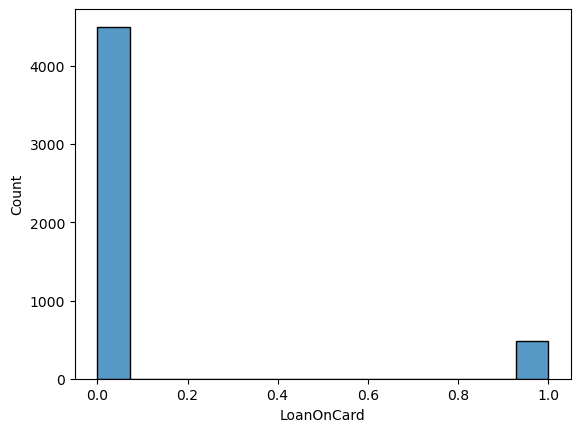

In [40]:
sns.histplot(data=dfBank, x='LoanOnCard')
plt.show()

In [41]:
dfBank[(dfBank.LoanOnCard == '1') & (dfBank.CreditCard == 0)]['LoanOnCard'].count()

0

__Observations__

Histoplot clearly shows uneven distribution of LoanOnCard variable. 
This shows most of the customers haven't opted for the loan and there are plenty of opportunities of improvement where bank can look to improve their loan business.

__Data accuracy__

Also, there are 337 records where LoanOnCard is 1 but CreditCard is 0. This is quite conflicting as general understanding is; customer should have credit card for opting for loan on card. This needs attention and maybe correction.

### Q.2.B. Check the percentage of missing values and impute if required

In [42]:
#print null values percentages
print("percentage of missing data of dataframe \n",dfBank.isnull().sum()/len(dfBank)*100) 

percentage of missing data of dataframe 
 ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [43]:
#Proportion of null values in LoanOnCard variable is minor. 
#Also, variable 'LoanOnCard' is dependent variable with values only 0 and 1. 
#We could impute the null values with 0 (mode) however we will opt to drop null values to avoid possible bias. 
#As null data share is very low, it wont impact data size.
print(dfBank['Level'].value_counts().sum())
dfBank['Level'].value_counts()

dfBank.dropna(axis=0,inplace=True)
dfBank.isnull().sum()

5000


ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### Q.2.C. Check for unexpected values in each categorical variable and impute with best suitable value

In [44]:
#As we have already handled null values, Lets find various unique values in each categorical variable to find abnormilities in data 
print(dfBank['CreditCard'].value_counts())
print(dfBank['InternetBanking'].value_counts())
print(dfBank['FixedDepositAccount'].value_counts())
print(dfBank['Security'].value_counts())
print(dfBank['Level'].value_counts())
print(dfBank['HiddenScore'].value_counts())

CreditCard
0    3514
1    1466
Name: count, dtype: int64
InternetBanking
1    2974
0    2006
Name: count, dtype: int64
FixedDepositAccount
0    4678
1     302
Name: count, dtype: int64
Security
0    4460
1     520
Name: count, dtype: int64
Level
1    2089
3    1496
2    1395
Name: count, dtype: int64
HiddenScore
1    1466
2    1293
4    1215
3    1006
Name: count, dtype: int64


In [45]:
#We dont see any unexpected values in data and we can double check the same using below function as well
def is_not_digit_between_0_and_9(input_text):
    try:
        # Attempt to convert the input text to an integer
        number = int(input_text)
        
        # Check if the number is between 0 and 9
        return not (0 <= number <= 4)
    
    except ValueError:
        # If the conversion to int fails, it's not a number
        return True

columns_to_check = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for column in columns_to_check:
    condition = dfBank[column].apply(lambda x: is_not_digit_between_0_and_9(x))
    rows_with_true_condition = dfBank[condition]

    # Display the rows where the condition is True
    if not rows_with_true_condition.empty:
        print(f"Rows in '{column}' where the condition is True:")
        print(rows_with_true_condition)
        print("\n")
    else:
        print(f"No unexpected values in '{column}'")
            


No unexpected values in 'CreditCard'
No unexpected values in 'InternetBanking'
No unexpected values in 'FixedDepositAccount'
No unexpected values in 'Security'
No unexpected values in 'Level'
No unexpected values in 'HiddenScore'


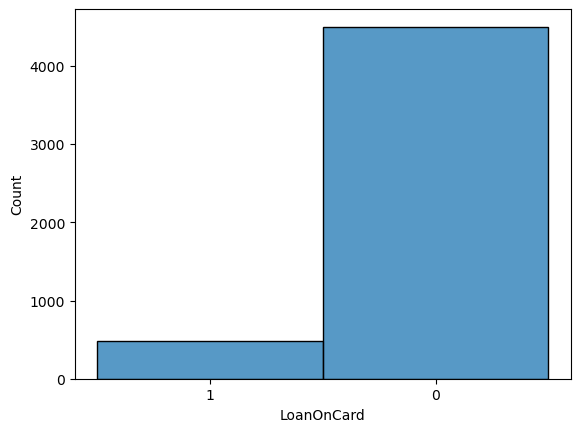

In [46]:
#Lets convert LoanOnCard into categorical variable as it contains binary values and lets check the distribution again
dfBank['LoanOnCard'] = dfBank['LoanOnCard'].astype(int)
dfBank['LoanOnCard'] = dfBank['LoanOnCard'].astype(str)

#lets check distribution now
sns.histplot(data=dfBank, x='LoanOnCard')
plt.show()

## Q.3. Data Preparation and model building

#### Data Analysis and Goal statement

* The dataset comprises banking data containing various customer details, with the target variable being "LoanOnCard." The objective is to construct a predictive model using the existing data to determine whether future customers will opt for a loan on a card. Success in this context is measured by the accurate prediction of customers opting for a loan.

* In the business scenario, missing out on opportunities by failing to attract potential customers can incur significant costs.

* The "LoanOnCard" variable has two classes, 0 and 1. In this context, class 1 represents a positive outcome, indicating whether the business successfully secured a customer for a loan.

* Given the scenario, a false negative (predicting a potential customer as a non-customer) is considered more costly than a false positive (predicting a non-customer as a customer). Therefore, the emphasis is on minimizing false negatives.

* To achieve this goal, the model is designed to maximize the recall for class 1, ensuring that instances of customers opting for a loan are accurately identified.

* Consequently, the evaluation metrics will focus on __Class 1 recall__ along with overall accuracy as a key performance indicator for the model.

### Q.3.A. Split data into X and Y

In [47]:
#Lets drop ID & ZipCode as they are not adding any value to model building
columns_to_drop = ['ID', 'ZipCode']
dfB = dfBank.drop(columns=columns_to_drop)

In [48]:
#Lets now split the dataset into independent and dependent(target) variable
X = dfB.drop(['LoanOnCard'], axis=1)
y = dfB['LoanOnCard']

### Q.3.B. Split data into train and test. Keep 25% data reserved for testing

In [49]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("Training X:",X_train.shape)
print("Training y:",y_train.shape)
print("Testing X:",X_test.shape)
print("Testing y:",y_test.shape)

Training X: (3735, 11)
Training y: (3735,)
Testing X: (1245, 11)
Testing y: (1245,)


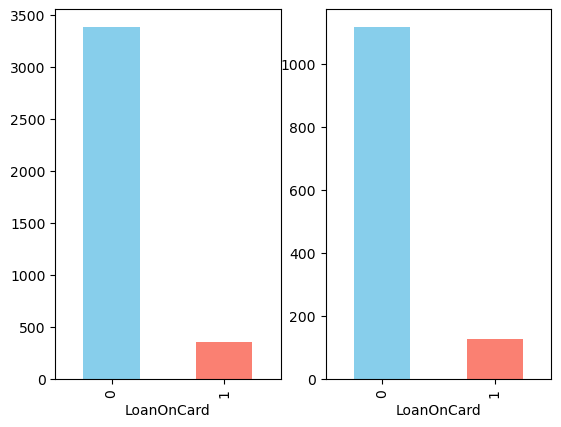

In [50]:
#Lets plot distribution of train and test data
colors = ['skyblue', 'salmon'] 
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar', color=colors)

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar', color=colors)
plt.show()

### Prepare result set for storing results of each model with various parameters combination

In [51]:
#Lets define a function to store result of each model/combination in dataframe results_df
columns = ['Model', 'Accuracy','Precision','Precision_0', 'Recall_0', 'F1_Score_0','Precision_1', 'Recall_1', 'F1_Score_1']
results_df = pd.DataFrame(columns=columns)
def AddModelResults(df, model, Accuracy, Precision,Precision_1, Recall_1, F1_Score_1, Precision_2, Recall_2, F1_Score_2):
    if (df['Model'] == model).any():        
        # Update existing row
        df.loc[df['Model'] == model, ['Accuracy','Precision','Precision_0', 'Recall_0', 'F1_Score_0','Precision_1', 'Recall_1', 'F1_Score_1']] = [Accuracy, Precision, Precision_1, Recall_1, F1_Score_1, Precision_2, Recall_2, F1_Score_2]
    else:
        # Append a new row        
        new_row = {'Model': model, 'Accuracy': Accuracy,'Precision':Precision, 'Precision_0': Precision_1, 'Recall_0': Recall_1, 'F1_Score_0': F1_Score_1, 'Precision_1': Precision_2, 'Recall_1': Recall_2, 'F1_Score_1': F1_Score_2}
        #df = df.append(new_row, ignore_index=True) 
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    return df


### Q.3.C. Train a Supervised Learning Classification base model - Logistic Regression

In [52]:
# Fit the model on training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_pred = model.predict(X_test)

### Q.3.D. Print evaluation metrics for the model and clearly share insights

In [53]:
#Lets measure accuracy of the model
model_score = model.score(X_test, y_test)
print(model_score)
# Let's use accuracy_score to check accuracy score
print(accuracy_score(y_test, y_pred))

0.9477911646586346
0.9477911646586346


In [54]:
# Evaluate the model using various metrics

#lets define a function for printing evaluation metrix for giben model. 
#It will also call AddModelResults to add results in dataframe
def ModelPerformance(Name,testValue, predictedValue):
    accuracy = accuracy_score(testValue, predictedValue)
    precision = precision_score(testValue, predictedValue, average='weighted')
    recall = recall_score(testValue, predictedValue, average='weighted')
    f1 = f1_score(testValue, predictedValue, average='weighted')
    conf_matrix = confusion_matrix(testValue, predictedValue)
    classification_rep = classification_report(testValue, predictedValue)
    
    # Print the evaluation metrics
    print('*'*15, Name, '*'*15)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1-Score:",f1)
    print("Confusion Matrix:")
    print(conf_matrix)
   
    print("Classification Report:")
    print(classification_rep)
    print('*'*80)
    #Lets add values in result dataset
    C_precision, C_recall, C_f1_score, _ = np.round(precision_recall_fscore_support(testValue, predictedValue, average=None),2)
    #print(C_precision[0], C_recall[0], C_f1_score[0], C_precision[1], C_recall[1], C_f1_score[1])
    return AddModelResults(results_df, Name, np.round(accuracy,2), np.round(precision,2) ,C_precision[0], C_recall[0], C_f1_score[0], C_precision[1], C_recall[1], C_f1_score[1])

In [55]:
#Lets print evaluation metrics of basic logistics regression model
results_df = ModelPerformance('LG | original data',y_test, y_pred)


*************** LG | original data ***************
Accuracy: 0.9477911646586346
Precision: 0.9445714420501207
Recall: 0.9477911646586346
F1-Score: 0.943503449011995
Confusion Matrix:
[[1105   13]
 [  52   75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1118
           1       0.85      0.59      0.70       127

    accuracy                           0.95      1245
   macro avg       0.90      0.79      0.83      1245
weighted avg       0.94      0.95      0.94      1245

********************************************************************************


__Note__
As articulated in the goal statement, the emphasis is on recall over precision, given the priority of maximizing opportunities and minimizing false negatives. In this context, retaining potential customers is deemed more crucial than accurately predicting customers who may not convert. Therefore, the primary focus will be on optimizing the recall of class 1 in the evaluation metrics.

__Observations__
Considering LoanOnCard 1 as positive:

True Negative (TN): 1105 instances were correctly predicted as class 0.

False Positive (FP): 13 instances were incorrectly predicted as class 1.

True Positive (TP): 75 instances were correctly predicted as class 1.

False Negative (FN): 52 instances were incorrectly predicted as class 0.

Accuracy:
The model has achieved an overall accuracy rate of 95% in the test set.

Class 1 Prediction Measurements:
Precision: There is a decent 85% precision for predicting customers opting for a loan on a card out of the total predictions.
Recall: However, the recall for class 1 is not optimal, standing at 59%. This implies that only 59% of actual class 1 instances were correctly predicted.

Class 0:
Precision: Very good precision for class 0, with 96% of predictions for class 0 being correct from overall predictions.
Recall: The model correctly predicted 99% of class 0 instances out of all actual class 0 instances.
Model Performance Summary:
The model demonstrates commendable accuracy, performing exceptionally well for class 0 predictions. However, it exhibits room for improvement in class 1 predictions, especially in terms of recall. The focus may need to be shifted towards enhancing the model's ability to correctly identify instances of customers opting for a loan on a card (class 1).

__Insights__
* Importantly, our primary interest lies in maximizing the __Recall of class 1__ as we aim to avoid missing potential loan customers. Minimizing False negatives is crucial to enhance Recall, ensuring the identification of a maximum number of possible customers.

* Therefore, our focus is specifically on improving the recall for class 1 rather than prioritizing precision. The goal is to capture as many instances of customers opting for a loan on a card as possible.

* It is evident that the model requires further refinement to enhance the recall of class 1, aligning with our objective of accurately predicting and retaining potential loan customers.


### Q.3.E. Balance the data using the right balancing technique

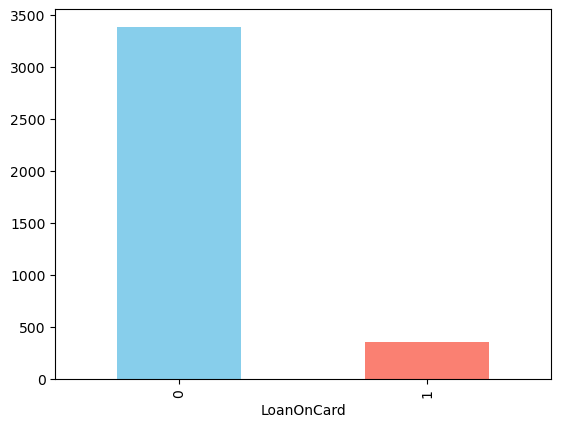

Class Distribution (%) for LoanOnCard:
LoanOnCard
0    89.799197
1    10.200803
Name: proportion, dtype: float64


In [56]:
#Lets plot distribution of target variable
y_train.value_counts().plot(kind = 'bar', color=colors)
plt.show()
print("Class Distribution (%) for LoanOnCard:")
print(y_test.value_counts(normalize=True) * 100)

Class Distribution (%) for LoanOnCard:
LoanOnCard
0    50.0
1    50.0
Name: proportion, dtype: float64


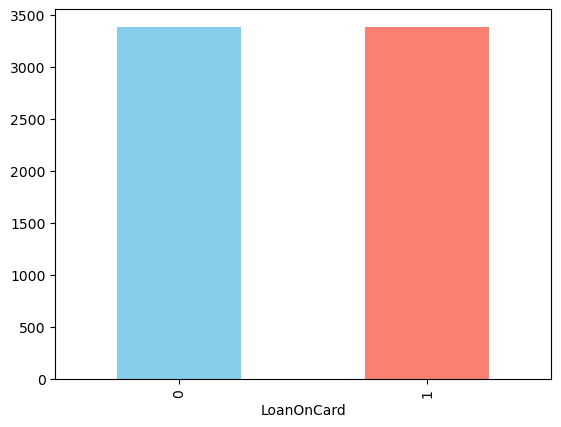

In [57]:
#Plot shows that there is imbalance in target variable data

#Lets try to balance target variable distribution in 50:50 proportion. 
#Lets use oversampling with minority method and check performance
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

#Lets now observe distribution of target variable
print("Class Distribution (%) for LoanOnCard:")
print(y_resampled.value_counts(normalize=True) * 100)
y_resampled.value_counts().plot(kind = 'bar', color=colors)
plt.show()

### Q.3.F. Again train the same previous model on balanced data.

In [58]:
# Lets train the model on resampled data
modelNew = LogisticRegression(solver="liblinear")
modelNew.fit(X_resampled, y_resampled)
#predict on test
y_pred_new = modelNew.predict(X_test)

### Q.3.G. Print evaluation metrics and clearly share differences observed.

In [59]:
# Lets print various evaluation metrics using ModelPerformance function
results_df = ModelPerformance('LG | balanced data(RandomOverSampler)',y_test, y_pred_new)

*************** LG | balanced data(RandomOverSampler) ***************
Accuracy: 0.891566265060241
Precision: 0.9365805665897088
Recall: 0.891566265060241
F1-Score: 0.905222100327175
Confusion Matrix:
[[995 123]
 [ 12 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1118
           1       0.48      0.91      0.63       127

    accuracy                           0.89      1245
   macro avg       0.74      0.90      0.78      1245
weighted avg       0.94      0.89      0.91      1245

********************************************************************************


In [60]:
#Lets try to balance data using SMOTE technique
smt = SMOTE()
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
lg = LogisticRegression(solver="liblinear")
lg.fit(X_resampled_smt, y_resampled_smt)
#predict on test
y_pred_smt = lg.predict(X_test)
# Lets evaluate results using various metrics
results_df = ModelPerformance('LG | balanced data(SMOTE)',y_test, y_pred_smt)

*************** LG | balanced data(SMOTE) ***************
Accuracy: 0.8939759036144578
Precision: 0.9363660072102349
Recall: 0.8939759036144578
F1-Score: 0.9069468484265701
Confusion Matrix:
[[999 119]
 [ 13 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1118
           1       0.49      0.90      0.63       127

    accuracy                           0.89      1245
   macro avg       0.74      0.90      0.79      1245
weighted avg       0.94      0.89      0.91      1245

********************************************************************************


As there is no much difference observed in output of RandomOverSampler and SMOTE technique, we will continue using data obtained from RandomOverSampler sampling.

__Key Observations (Differences after balancing data)__

Accuracy Before: 0.95 | Accuracy After : 0.89

Precision Before: 0.95 | Precision After: 0.93

Recall (Class1) Before: 0.59 | Recall (Class1) After: 0.88

TP Before : 75 | TP After : 115

FN Before : 52 | FN After : 15

1. Though accuracy and precision is slightly reduced after resampling. However, as mentioned earlier, we are more concerned about Recall (class1) than precision.
2. However, __class1 recall__ has drastically increased (59% to 91%). Meaning we are successful in reducing false negatives after rebalancing training data.
3. Flase Negative (error) has decreased drastically for class 1. Also TTrue Negative also has increased.
4. Hence improved model will be able to predict possible customers more accurately without minimum scope of losing opportunities. This will result in business growth.
5. Conclusion : Balancing training data has positively improved model for predicting possible customers, thus improving business opportunities. We found oversampling technique is giving better results for balancing

## Q.4. Performance Improvement

### Q.4.A. Train a base model each for SVM, KNN.

Lets start with SVM model

In [61]:
#Training SVM model with all default parameters. We will fine tune parameters in later section
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.90


In [62]:
# Evaluate the model using various metrics, lets print it using ModelPerformance function
results_df = ModelPerformance('SVM | original data',y_test, y_pred_svm)

*************** SVM | original data ***************
Accuracy: 0.9028112449799197
Precision: 0.8807289566428981
Recall: 0.9028112449799197
F1-Score: 0.8696590327968959
Confusion Matrix:
[[1111    7]
 [ 114   13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1118
           1       0.65      0.10      0.18       127

    accuracy                           0.90      1245
   macro avg       0.78      0.55      0.56      1245
weighted avg       0.88      0.90      0.87      1245

********************************************************************************


As it can be observed, though overall accuracy is good, model underperforms in terms of Recall for class1. Hence lets try improving model.

In [63]:
#Lets use SVM model with oversampled data
svc.fit(X_resampled, y_resampled)
#predict on test
y_pred_svc_sample = svc.predict(X_test)
#Lets measure performance after balancing
results_df = ModelPerformance('SVM | balanced data',y_test, y_pred_svc_sample)

*************** SVM | balanced data ***************
Accuracy: 0.8248995983935743
Precision: 0.9280963315935706
Recall: 0.8248995983935743
F1-Score: 0.8551062690399875
Confusion Matrix:
[[907 211]
 [  7 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1118
           1       0.36      0.94      0.52       127

    accuracy                           0.82      1245
   macro avg       0.68      0.88      0.71      1245
weighted avg       0.93      0.82      0.86      1245

********************************************************************************


SVM model performs well on oversampled data by pulling excellent recall value for class 1.

Lets try with KNN model

In [64]:
#lets write a function to find best optimal k value for KNN model
def FindBestK(X_train_k, y_train_k, X_test_k, y_test_k, size):
    myList = list(range(1,size))

    # subsetting just the odd ones
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold accuracy scores
    ac_scores = []

    # perform accuracy metrics for values from 1,3,5....19
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_k,y_train_k)
        # predict the response
        y_pred = knn.predict(X_test_k)
        # evaluate accuracy
        scores = accuracy_score(y_test_k, y_pred)
        ac_scores.append(scores)

    # changing to misclassification error
    MSE = [1 - x for x in ac_scores]
     # plot misclassification error vs k
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]    
    print("The optimal number of neighbors is %d" % optimal_k)
    return optimal_k
    

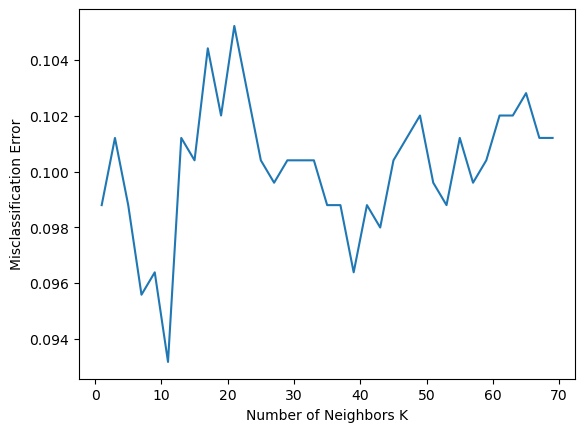

The optimal number of neighbors is 11
optimal k: 11


In [65]:
#squrt of datasize length to be used as threshold for finding ideal k value
sqrt_n = int(np.sqrt(len(X_train + X_test)))
optimal_k = FindBestK(X_train, y_train, X_test, y_test, sqrt_n)
print('optimal k:', optimal_k)

In [66]:
#Lets fit Knn model with k value 7 to start wih
knn = KNeighborsClassifier(n_neighbors = optimal_k)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred_knn = knn.predict(X_test)
results_df = ModelPerformance('KNN | original data | k=' + str(optimal_k),y_test, y_pred_knn)

*************** KNN | original data | k=11 ***************
Accuracy: 0.9068273092369478
Precision: 0.8891754657086476
Recall: 0.9068273092369478
F1-Score: 0.8918081925275829
Confusion Matrix:
[[1093   25]
 [  91   36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1118
           1       0.59      0.28      0.38       127

    accuracy                           0.91      1245
   macro avg       0.76      0.63      0.67      1245
weighted avg       0.89      0.91      0.89      1245

********************************************************************************


As we can see recall value is very poor with orginal data, lets use KNN on balanced data set

In [67]:
# fitting the model on balanced data
knn_re = KNeighborsClassifier(n_neighbors = 13)
knn_re.fit(X_resampled, y_resampled)
# predict the response
y_pred_knn_resampled = knn_re.predict(X_test)
results_df = ModelPerformance('KNN | balanced data | k=13',y_test, y_pred_knn_resampled)

*************** KNN | balanced data | k=13 ***************
Accuracy: 0.8144578313253013
Precision: 0.9202325182438408
Recall: 0.8144578313253013
F1-Score: 0.8465276442559806
Confusion Matrix:
[[900 218]
 [ 13 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1118
           1       0.34      0.90      0.50       127

    accuracy                           0.81      1245
   macro avg       0.66      0.85      0.69      1245
weighted avg       0.92      0.81      0.85      1245

********************************************************************************


__Findings__

KNN and SVM both failed to perform well in terms of class1 Recall with original data. However, there is improvement especially in SVM model when applied with balanced data. SVM model pulled 81% accuracy and 90% class1 recall score when used with balanced data.

### Q.4.B. Tune parameters for each of the models wherever required and finalize a model

SVM model hyperparameter tuning

In [68]:
#Lets define a function that will capture training data and will try tuning parameters to find best results
def FindBestParametersForSVC(Name,X_training, y_training, X_test, y_test):
    param_grid = {
        'C': [100,200],            # Regularization parameter
        'kernel': ['rbf'], #'kernel': ['linear', 'rbf','sigmoid','poly'],      # Kernel type
        'gamma': [0.0001, 0.001, 0.01, 0.1],   # Kernel coefficient (only for 'rbf' kernel)
    }

    # Create an SVM model
    svm_model = SVC()

    # Use GridSearchCV for hyperparameter tuning
    scorer = make_scorer(recall_score)
    grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_training, y_training)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    print("Best Parameters:", grid_search.best_params_)
    return ModelPerformance(Name,y_test, y_pred_best)

In [69]:
#Lets try to train SVM model and hypertune parameters using GridSearchCV
results_df = FindBestParametersForSVC('SVM | original data | Hyperparameter tunin (GridSearchCV)', X_train, y_train, X_test, y_test)

Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
*************** SVM | original data | Hyperparameter tunin (GridSearchCV) ***************
Accuracy: 0.9590361445783132
Precision: 0.9578568241218843
Recall: 0.9590361445783132
F1-Score: 0.9558772400979086
Confusion Matrix:
[[1111    7]
 [  44   83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1118
           1       0.92      0.65      0.76       127

    accuracy                           0.96      1245
   macro avg       0.94      0.82      0.87      1245
weighted avg       0.96      0.96      0.96      1245

********************************************************************************


In [70]:
#Lets try hyperparameter tuning on oversampled data
results_df = FindBestParametersForSVC('SVM | balanced data | Hyperparameter tuning (GridSearchCV)', X_resampled, y_resampled, X_test, y_test)

Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
*************** SVM | balanced data | Hyperparameter tuning (GridSearchCV) ***************
Accuracy: 0.9244979919678715
Precision: 0.9472574531084387
Recall: 0.9244979919678715
F1-Score: 0.9314340498686378
Confusion Matrix:
[[1036   82]
 [  12  115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1118
           1       0.58      0.91      0.71       127

    accuracy                           0.92      1245
   macro avg       0.79      0.92      0.83      1245
weighted avg       0.95      0.92      0.93      1245

********************************************************************************


__Observations__
1. As it has been noticed, SVM model with default parameters does not do well to predict class1 values as recall measure for class1 is poor(10%).
2. Recall for class1 increased after trying with hyperparameters though it was not great (65%)
3. Trying SVM model with default parameters increased class1 recall however precision was very low.
4. Using various hyperparameters values in SVM model and using oversampling data helped good balance between great recall and good precision for class1. Hence it can be conclided that this is best model so far.

##### KNN model hyperparameter tuning

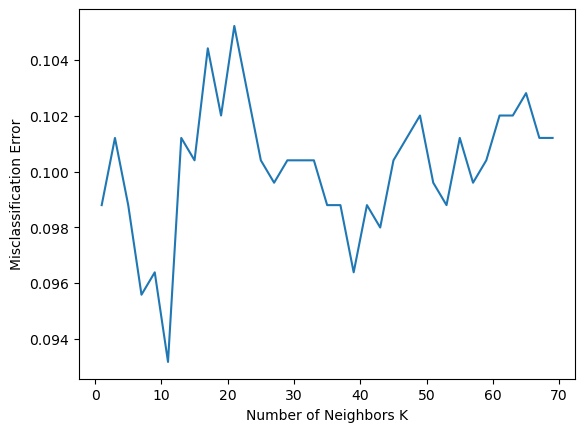

The optimal number of neighbors is 11


In [71]:
#qurt of datasize length to be used as threshold for finding k value
sqrt_n = int(np.sqrt(len(X_train + X_test)))
optimal_k = FindBestK(X_train, y_train, X_test, y_test, sqrt_n)

In [72]:
knn_re = KNeighborsClassifier(n_neighbors = optimal_k)
knn_re.fit(X_train, y_train)
# predict the response
y_pred_knn = knn_re.predict(X_test)
results_df = ModelPerformance('KNN | original data | Hyperparameter tuning(optimal k)',y_test, y_pred_knn)

*************** KNN | original data | Hyperparameter tuning(optimal k) ***************
Accuracy: 0.9068273092369478
Precision: 0.8891754657086476
Recall: 0.9068273092369478
F1-Score: 0.8918081925275829
Confusion Matrix:
[[1093   25]
 [  91   36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1118
           1       0.59      0.28      0.38       127

    accuracy                           0.91      1245
   macro avg       0.76      0.63      0.67      1245
weighted avg       0.89      0.91      0.89      1245

********************************************************************************


Again its been observed that model does not perform well on original data. Lets now try tuning hyperparameters for KNN using GridSearchCV. 

In [73]:
#Lets write a function for tuning hyperparameters for KNN model using GridSearchCV
from sklearn.metrics import make_scorer, recall_score
def TuneParamsKNN(Name,xtrain, ytrain, xtest,ytest):

    param_grid = {
        'n_neighbors': [11,13,15,17],       # Number of neighbors
        'weights': ['distance','uniform'],  # Weight function used in prediction
        'metric': ['euclidean', 'manhattan']  # Distance metric
    }

    # Create a KNN model
    knn_model = KNeighborsClassifier()

    # Define a custom scorer for recall of class 1
    scorer = make_scorer(recall_score, pos_label='1')

    # Use GridSearchCV for hyperparameter tuning
    grid_search2 = GridSearchCV(knn_model, param_grid, cv=5, scoring=scorer, n_jobs=-1, refit=True)
    #grid_search2.fit(X_resampled, y_resampled)
    grid_search2.fit(xtrain, ytrain)

    # Get the best hyperparameters
    best_params = grid_search2.best_params_
    print(best_params)
    # Use the best model for predictions
    best_model = grid_search2.best_estimator_
    y_pred1 = best_model.predict(xtest)

    results_df = ModelPerformance(Name,ytest, y_pred1)
    return results_df

In [74]:
#Lets now call the function for finding best model using GridSearchCV Hyperparameter tuning for original training data and then balanced data
results_df = TuneParamsKNN('KNN | original data | Hyperparameter tuning(GridSearchCV)',X_train, y_train, X_test,y_test)
results_df = TuneParamsKNN('KNN | balanced data | Hyperparameter tuning(GridSearchCV)',X_resampled, y_resampled, X_test,y_test)

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
*************** KNN | original data | Hyperparameter tuning(GridSearchCV) ***************
Accuracy: 0.9140562248995984
Precision: 0.9007702711342161
Recall: 0.9140562248995984
F1-Score: 0.8954386935604438
Confusion Matrix:
[[1105   13]
 [  94   33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1118
           1       0.72      0.26      0.38       127

    accuracy                           0.91      1245
   macro avg       0.82      0.62      0.67      1245
weighted avg       0.90      0.91      0.90      1245

********************************************************************************
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
*************** KNN | balanced data | Hyperparameter tuning(GridSearchCV) ***************
Accuracy: 0.8369477911646587
Precision: 0.9178176634436667
Recall: 0.8369477911646587
F1-Score: 0

##### Print all model results

In [75]:
#Lets now print output of all models and combinations tried so far
print('*'*25, 'Performance Comparison of all model with various combination', '*'*25)
pd.set_option('display.max_colwidth', None)
results_df 


************************* Performance Comparison of all model with various combination *************************


Model  Accuracy  \
0                                           LG | original data      0.95   
1                        LG | balanced data(RandomOverSampler)      0.89   
2                                    LG | balanced data(SMOTE)      0.89   
3                                          SVM | original data      0.90   
4                                          SVM | balanced data      0.82   
5                                   KNN | original data | k=11      0.91   
6                                   KNN | balanced data | k=13      0.81   
7    SVM | original data | Hyperparameter tunin (GridSearchCV)      0.96   
8   SVM | balanced data | Hyperparameter tuning (GridSearchCV)      0.92   
9       KNN | original data | Hyperparameter tuning(optimal k)      0.91   
10   KNN | original data | Hyperparameter tuning(GridSearchCV)      0.91   
11   KNN | balanced data | Hyperparameter tuning(GridSearchCV)      0.84   

    Precision  Precision_0  Recall_0  F1_Score_0  Precision_1  Recall_1  \
0        0.94         0.96      0.99        0.97         0.85      0.59   
1        0.94         0.99      0.89        0.94         0.48      0.91   
2        0.94         0.99      0.89        0.94         0.49      0.90   
3        0.88         0.91      0.99        0.95         0.65      0.10   
4        0.93         0.99      0.81        0.89         0.36      0.94   
5        0.89         0.92      0.98        0.95         0.59      0.28   
6        0.92         0.99      0.81        0.89         0.34      0.90   
7        0.96         0.96      0.99        0.98         0.92      0.65   
8        0.95         0.99      0.93        0.96         0.58      0.91   
9        0.89         0.92      0.98        0.95         0.59      0.28   
10       0.90         0.92      0.99        0.95         0.72      0.26   
11       0.92         0.98      0.84        0.90         0.37      0.85   

    F1_Score_1  
0         0.70  
1         0.63  
2         0.63  
3         0.18  
4         0.52  
5         0.38  
6         0.50  
7         0.76  
8         0.71  
9         0.38  
10        0.38  
11        0.52

##### Finalize model
__Obeservations__

Having explored multiple models with various techniques, it is evident that while accuracy is satisfactory across all models, our paramount focus is on achieving a commendable recall score. This emphasis on recall is crucial to avoid missing potential customers, necessitating a reduction in false negatives to enhance the overall recall score.

Notably, models trained with balanced data consistently exhibit superior recall scores for class 1. Taking into account class 1 recall, overall accuracy, and precision, the following model stands out as a recommended choice:

__SVM | balanced data | Hyperparameter tuning (GridSearchCV)__. 

[Overall Accuracy: 91 Overall Precision:0.95 Class1 Recall: 0.91 and Class1:Precision 0.58]

This model was trained on oversampled data.

This model aligns with the goal of maximizing recall for class 1, ensuring a robust ability to identify and retain potential customers seeking a loan on a card.

If we compare performance measures of this model from 1st basic model, we see overall accuracy has reduced by 3%. However, as mentioned in goal statement, we are interested in finding good balance of Class 1 recall and overall accuracy. As we see class1 recall 54%, meaning ability to reduce FN and to predict potential customers accurately has increased. Model gave good F1 score (0.71). Hence all these facts helped to select and recommend this as best model.





### Q.4.C. Print evaluation metrics for final model.

In [76]:
pd.set_option('display.max_colwidth', None)
results_df 

Model  Accuracy  \
0                                           LG | original data      0.95   
1                        LG | balanced data(RandomOverSampler)      0.89   
2                                    LG | balanced data(SMOTE)      0.89   
3                                          SVM | original data      0.90   
4                                          SVM | balanced data      0.82   
5                                   KNN | original data | k=11      0.91   
6                                   KNN | balanced data | k=13      0.81   
7    SVM | original data | Hyperparameter tunin (GridSearchCV)      0.96   
8   SVM | balanced data | Hyperparameter tuning (GridSearchCV)      0.92   
9       KNN | original data | Hyperparameter tuning(optimal k)      0.91   
10   KNN | original data | Hyperparameter tuning(GridSearchCV)      0.91   
11   KNN | balanced data | Hyperparameter tuning(GridSearchCV)      0.84   

    Precision  Precision_0  Recall_0  F1_Score_0  Precision_1  Recall_1  \
0        0.94         0.96      0.99        0.97         0.85      0.59   
1        0.94         0.99      0.89        0.94         0.48      0.91   
2        0.94         0.99      0.89        0.94         0.49      0.90   
3        0.88         0.91      0.99        0.95         0.65      0.10   
4        0.93         0.99      0.81        0.89         0.36      0.94   
5        0.89         0.92      0.98        0.95         0.59      0.28   
6        0.92         0.99      0.81        0.89         0.34      0.90   
7        0.96         0.96      0.99        0.98         0.92      0.65   
8        0.95         0.99      0.93        0.96         0.58      0.91   
9        0.89         0.92      0.98        0.95         0.59      0.28   
10       0.90         0.92      0.99        0.95         0.72      0.26   
11       0.92         0.98      0.84        0.90         0.37      0.85   

    F1_Score_1  
0         0.70  
1         0.63  
2         0.63  
3         0.18  
4         0.52  
5         0.38  
6         0.50  
7         0.76  
8         0.71  
9         0.38  
10        0.38  
11        0.52

##### Best model for given business scenario
SVM | balanced data | Hyperparameter tuning (GridSearchCV).

[Overall Accuracy: 91 Overall Precision:0.95 Class1 Recall: 0.91 and Class1:Precision 0.58]

This model strikes a balance, exhibiting excellent accuracy and precision, along with an outstanding class 1 recall and sufficiently high precision. In the context of the given business scenario, where recall score holds paramount importance, we prioritize models with the best recall scores.

It's crucial to ensure that precision remains reasonably high without sacrificing recall. Therefore, based on these considerations, we confidently conclude that this model is the optimal choice.

This model aligns with the goal of maximizing recall for class 1, ensuring a robust ability to identify and retain potential customers seeking a loan on a card.

If we compare performance measures of this model from 1st basic model, we see overall accuracy has reduced by 3%. However, as mentioned in goal statement, we are interested in finding good balance of Class 1 recall and overall accuracy. As we see class1 recall 54%, meaning ability to reduce FN and to predict potential customers accurately has increased. Model gave good F1 score (0.71). Hence all these facts helped to select and recommend this as best model.


In [77]:
#Lets reprint evaluation matrix for final(best) model
FindBestParametersForSVC('SVM | balanced data | Hyperparameter tuning (GridSearchCV)', X_resampled, y_resampled, X_test, y_test)

Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
*************** SVM | balanced data | Hyperparameter tuning (GridSearchCV) ***************
Accuracy: 0.9244979919678715
Precision: 0.9472574531084387
Recall: 0.9244979919678715
F1-Score: 0.9314340498686378
Confusion Matrix:
[[1036   82]
 [  12  115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1118
           1       0.58      0.91      0.71       127

    accuracy                           0.92      1245
   macro avg       0.79      0.92      0.83      1245
weighted avg       0.95      0.92      0.93      1245

********************************************************************************


Model  Accuracy  \
0                                           LG | original data      0.95   
1                        LG | balanced data(RandomOverSampler)      0.89   
2                                    LG | balanced data(SMOTE)      0.89   
3                                          SVM | original data      0.90   
4                                          SVM | balanced data      0.82   
5                                   KNN | original data | k=11      0.91   
6                                   KNN | balanced data | k=13      0.81   
7    SVM | original data | Hyperparameter tunin (GridSearchCV)      0.96   
8   SVM | balanced data | Hyperparameter tuning (GridSearchCV)      0.92   
9       KNN | original data | Hyperparameter tuning(optimal k)      0.91   
10   KNN | original data | Hyperparameter tuning(GridSearchCV)      0.91   
11   KNN | balanced data | Hyperparameter tuning(GridSearchCV)      0.84   

    Precision  Precision_0  Recall_0  F1_Score_0  Precision_1  Recall_1  \
0        0.94         0.96      0.99        0.97         0.85      0.59   
1        0.94         0.99      0.89        0.94         0.48      0.91   
2        0.94         0.99      0.89        0.94         0.49      0.90   
3        0.88         0.91      0.99        0.95         0.65      0.10   
4        0.93         0.99      0.81        0.89         0.36      0.94   
5        0.89         0.92      0.98        0.95         0.59      0.28   
6        0.92         0.99      0.81        0.89         0.34      0.90   
7        0.96         0.96      0.99        0.98         0.92      0.65   
8        0.95         0.99      0.93        0.96         0.58      0.91   
9        0.89         0.92      0.98        0.95         0.59      0.28   
10       0.90         0.92      0.99        0.95         0.72      0.26   
11       0.92         0.98      0.84        0.90         0.37      0.85   

    F1_Score_1  
0         0.70  
1         0.63  
2         0.63  
3         0.18  
4         0.52  
5         0.38  
6         0.50  
7         0.76  
8         0.71  
9         0.38  
10        0.38  
11        0.52

### Q.4.D. Share improvement achieved from base model to final model

##### Performance improvement

Best Model : SVM | balanced data | Hyperparameter tuning (GridSearchCV).

[Overall Accuracy: 91 Overall Precision:0.95 Class1 Recall: 0.91 and Class1:Precision 0.58]

We have explored multiple models and various combination of parameters. We have stored the results and already identified the best results. Lets see exactly how much improvement we have achieved. 

Accuracy Before: 0.95 | Accuracy After : 0.92

Precision Before: 0.95 | Precision After: 0.95

Recall (Class1) Before: 0.59 | Recall (Class1) After: __0.91__

F1 (Class1) Before: 0.70 | F1 (Class1) After:0.71

TP Before : 75 | TP After : 115

FN Before : 52 | FN After : 12

Overall accuracy has dropped slightly and precision is almost same. However, important fact is Recall for class 1 has increased drastically and that is good success for model. It has kept descent precision and good F1 score for class 1. Model seems to predicting accurately with very low chances of missing out on predicting potential customers. False negative have decreased significantly and that is what matter the most in this business case. 
All in all, we can conclude that model is achieving what has been defined in goal statement.

Lets __print the improvement in %__ in terms of overall accuracy, precision, class1 Recall and class1 precision.

In [78]:
#Lets print improvements achieved in each metrics component
best_model_B = results_df.loc[results_df['Model'] == 'SVM | balanced data | Hyperparameter tuning (GridSearchCV)']
best_model_B['Accuracy'].values[0]
default_model_B = results_df.loc[results_df['Model'] == 'LG | original data']

print("Best Model:",best_model_B['Model'].values[0])

acc_improvement_percentage_test = np.round(((best_model_B['Accuracy'].values[0] - default_model_B['Accuracy'].values[0]) / default_model['Accuracy'].values[0]) * 100,2)
print("Accuracy improvement after parameters tuning and oversampling (%):", acc_improvement_percentage_test)

prec_improvement_percentage_test = np.round(((best_model_B['Precision'].values[0] - default_model_B['Precision'].values[0]) / default_model_B['Precision'].values[0]) * 100,2)
print("Precision improvement after tuning parameters and oversampling (%):", prec_improvement_percentage_test)
print('Apart from overall accuracy and precision, we are also interested in Recall for Type_1')

recall_improvement_percentage_test = np.round((((best_model_B['Recall_1'].values[0]) - (default_model_B['Recall_1'].values[0] )) / (default_model_B['Recall_1'].values[0])) * 100,2)
print("Recall for Class 1 improvement after parameters tuning and oversampling (%):", recall_improvement_percentage_test)



Best Model: SVM | balanced data | Hyperparameter tuning (GridSearchCV)
Accuracy improvement after parameters tuning and oversampling (%): -3.57
Precision improvement after tuning parameters and oversampling (%): 1.06
Apart from overall accuracy and precision, we are also interested in Recall for Type_1
Recall for Class 1 improvement after parameters tuning and oversampling (%): 54.24


#### Final Conclusion / Insights

Having extensively explored various combinations of multiple supervised learning models using diverse techniques, we can draw insightful conclusions:

* Across the board, accuracy on the original data for almost all models is satisfactory. However, the recall score on the original data is notably deficient.

* __Business scenario awareness__ : It was very important to identify correct measure of success before trying and evaluating the models. Many of the time just good accuracy is not enough for success. Hence we focus on consolidated measurement of accuracy, precision, recall (for class which matter most)

* To address this, we adopted a strategy of using balanced data obtained through oversampling methods.

* The recall scores for models trained on balanced data exhibit substantial improvement in almost all combinations.

* SVM (Support Vector Machine) emerges as the __standout performer__ in overall scores, particularly excelling in recall scores when trained with balanced data.

* __Balanced Data Impact__: Balancing target variable data using oversampling tecnique helped in achieving good model results

* The application of __hyperparameter tuning__ using GridSearchCV, with a specific focus on accuracy, especially for recall in SVM, has yielded impressive results for class 1 predictions. Notably, SVM has proven to be the best model as it achieved a balance of good precision while ensuring an outstanding recall score.
